## Logistic Regression

Veamos un poco de Regresión Logística. Usaría esta técnica para descubrir patrones para predecir categorías binarias. ¿Es esto un chocolate o no? ¿Este cliente elegirá este producto o no?

Construyamos un modelo de regresión logística para predecir que, dadas algunas variables, es probable que sea de qué color es probable que sea una calabaza determinada (orange 🎃 or white 👻).

Por qué estamos hablando de clasificación binaria en una clase sobre regresión? Solo por conveniencia lingüística, ya que la regresión logística es en realidad un método de clasificación, aunque lineal.

La regresión logística no ofrece las mismas características que la regresión lineal. El primero ofrece una predicción sobre una categoría binaria ("blanco o no blanco") mientras que el segundo es capaz de predecir valores continuos, por ejemplo, dado el origen de una calabaza y el momento de la cosecha, cuánto subirá su precio.

¿Recuerdas cómo la regresión lineal funcionaba mejor con más `variables correlacionadas`? La regresión logística es lo contrario: las variables no tienen que alinearse. Eso funciona para estos datos, que tienen correlaciones algo débiles.

La regresión logística dará resultados más precisos si se utilizan más datos; Nuestro pequeño conjunto de datos no es óptimo para esta tarea, así que tenlo en cuenta.

In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('./data/US-pumpkins.csv')

full_pumpkins.head(2)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN


In [2]:
# Select the columns we want to use
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

# Drop rows with missing values
pumpkins.dropna(inplace=True)

pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


### Visualization - categorical plot

A estas alturas, ha cargado el cuaderno de inicio con datos de calabaza una vez más y lo ha limpiado para conservar un conjunto de datos que contiene algunas variables, incluido el Color. Vamos a visualizar el dataFrame en el notebook usando `Seaborn`

`Seaborn`  ofrece algunas formas interesantes de visualizar sus datos. Por ejemplo, puede comparar las distribuciones de los datos para cada `Variety` y `Color` en un gráfico categórico.

Cree un gráfico de este tipo utilizando la función `catplot`, utilizando nuestros datos de calabaza `pumpkins` y especificando un mapeo de colores para cada categoría de calabaza (orange or white):

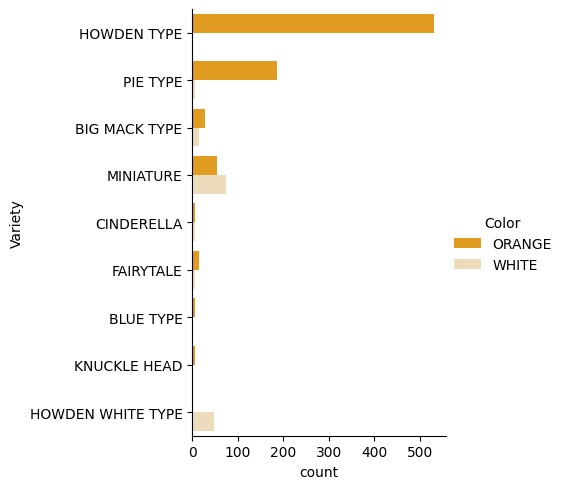

In [3]:
import seaborn as sns

palette = {
    'ORANGE': 'orange',
    'WHITE' : 'wheat'
}

sns.catplot(data=pumpkins, y="Variety", hue="Color", kind="count",palette=palette, )

### Data pre-processing: feature and label encoding

Nuestro conjunto de datos de calabazas contiene valores de cadena (strings) para todas sus columnas. Trabajar con datos categóricos es intuitivo para los humanos, pero no para las máquinas. Los algoritmos de aprendizaje automático funcionan bien con números. Es por eso que la codificación (encoding) es un paso muy importante en la fase de preprocesamiento de datos, ya que nos permite convertir datos categóricos en datos numéricos, sin perder ninguna información. Una buena codificación conduce a la construcción de un buen modelo.

Para la codificación de características, hay dos tipos principales de codificadores:

1. *Ordinal encoder:* se adapta bien a las variables ordinales, que son variables categóricas en las que sus datos siguen un orden lógico, como la columna `Item Size` en nuestro conjunto de datos. Crea una asignación tal que cada categoría está representada por un número, que es el orden de la categoría en la columna.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

2. *Categorical encoder:* se adapta bien a las variables nominales, que son variables categóricas en las que sus datos no siguen un orden lógico, como todas las características diferentes al `Item Size` en nuestro conjunto de datos. Es una codificación one-hot, lo que significa que cada categoría está representada por una columna binaria: la variable codificada es igual a 1 si la calabaza pertenece a esa variedad y 0 en caso contrario.

In [6]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

Luego, `ColumnTransformer` es utilizada para combinar multiples codificaciones en un solo paso y aplicarlas a las columnas apropiedas.

In [7]:
from sklearn.compose import ColumnTransformer
    
ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

Por otro lado, para codificar la etiqueta, usamos la clase de scikit-learn '`LabelEncoder`, que es una clase de utilidad para ayudar a normalizar las etiquetas de modo que contengan solo valores entre 0 y n_classes-1 (aquí, 0 y 1).

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

Una vez que hemos codificado las características y la etiqueta, podemos fusionarlas en un nuevo dataFrame:  `encoded_pumpkins`.

In [9]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

### Analizar las relaciones entre variables
Ahora que hemos preprocesado nuestros datos, podemos analizar las relaciones entre las características y la etiqueta para tener una idea de qué tan bien el modelo podrá predecir la etiqueta dadas las características. La mejor manera de realizar este tipo de análisis es ploteando los datos. 

C:\Users\valen\AppData\Local\Temp\ipykernel_58572\3754974362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


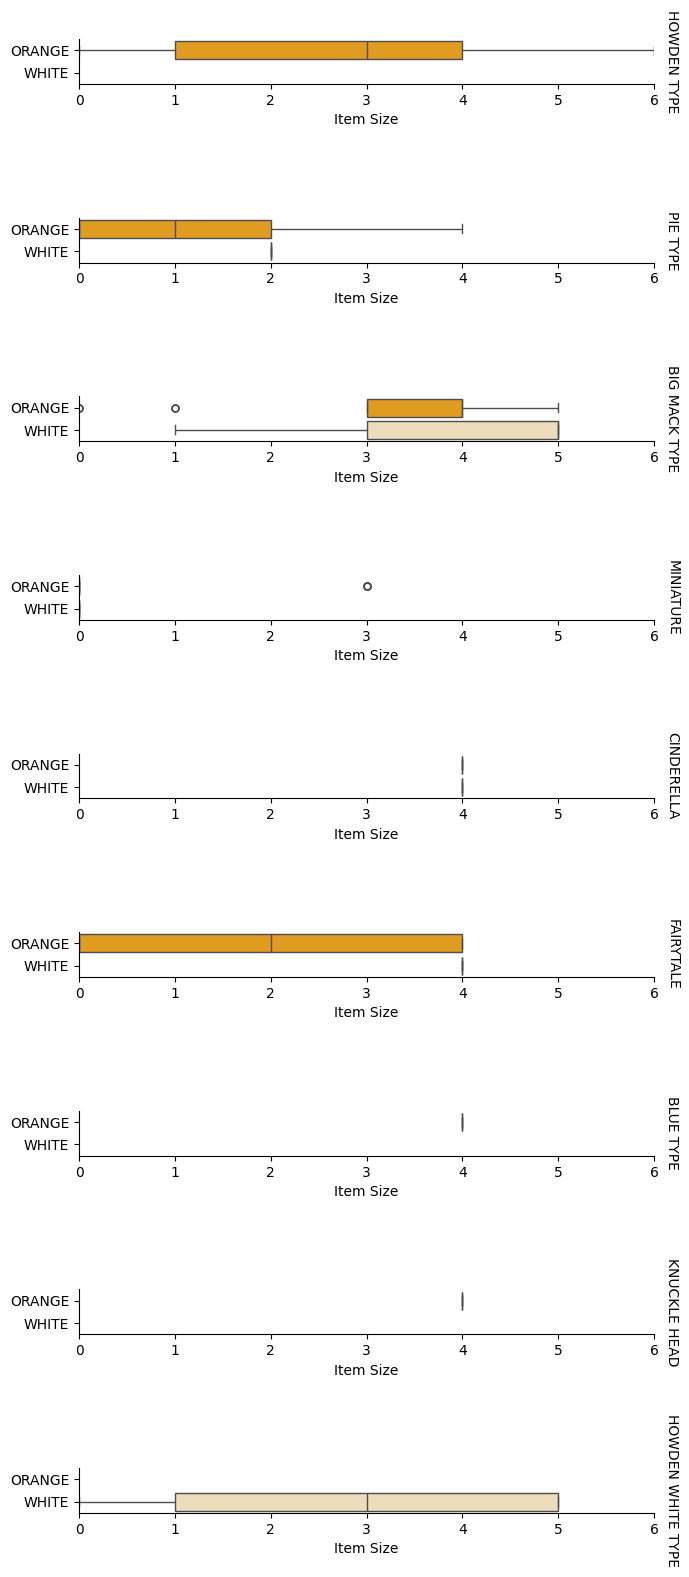

In [10]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

### Usar un diagrama de enjambre

Dado que el color es una categoría binaria (blanca o no), necesita "un enfoque especializado para la visualización". Hay otras formas de visualizar la relación de esta categoría con otras variables.

Puede visualizar variables en paralelo con los gráficos de Seaborn.

In [11]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='Color', ylabel='ord__Item Size'>

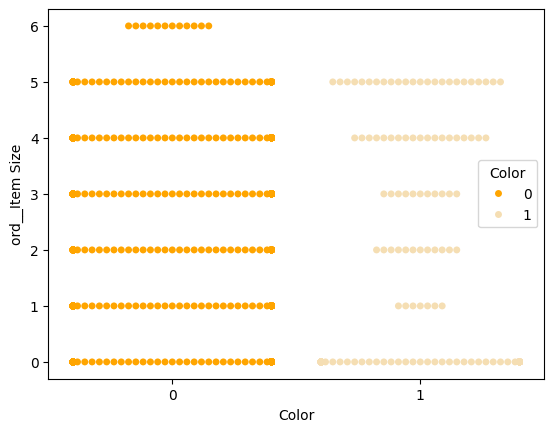

In [12]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", hue="Color", data=encoded_pumpkins, palette=palette)

Cuidado: Ignorar las advertencias NO es una buena práctica y debe evitarse, siempre que sea posible. Las advertencias a menudo contienen mensajes útiles que nos permiten mejorar nuestro código y resolver un problema. La razón por la que estamos ignorando esta advertencia específica es para garantizar la legibilidad de la trama. Trazar todos los puntos de datos con un tamaño de marcador reducido, manteniendo la coherencia con el color de la paleta, genera una visualización poco clara.

### Construye tu modelo

Construir un modelo para encontrar estas clasificaciones binarias es sorprendentemente sencillo en Scikit-learn.

In [13]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Train de model
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


### Mejor comprensión a través de una matriz de confusión

Si bien puede obtener los términos del informe del cuadro de indicadores imprimiendo los elementos anteriores, es posible que pueda comprender su modelo más fácilmente mediante el uso de una matriz de confusión para ayudarnos a comprender el rendimiento del modelo.

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]], dtype=int64)

TN: True Negative - FP: False Positive

FN: False Negative - TP: True Positive

¿Qué está pasando aquí? Supongamos que se le pide a nuestro modelo que clasifique las calabazas entre dos categorías binarias, la categoría 'blanca' y la categoría 'no blanca'.

- Si su modelo predice que una calabaza no es blanca y pertenece a la categoría 'no blanca', en realidad la llamamos un verdadero negativo, que se muestra en el número superior izquierdo.
- Si su modelo predice que una calabaza es blanca y pertenece a la categoría 'no-blanca', en realidad la llamamos falso negativo, que se muestra con el número inferior izquierdo.
- Si su modelo predice que una calabaza no es blanca y pertenece a la categoría 'blanca', en realidad la llamamos un falso positivo, que se muestra con el número superior derecho.
- Si su modelo predice que una calabaza es blanca y pertenece a la categoría 'blanca', en realidad la llamamos un verdadero positivo, que se muestra con el número inferior derecho.

Como habrás adivinado, es preferible tener un mayor número de verdaderos positivos y verdaderos negativos y un menor número de falsos positivos y falsos negativos, lo que implica que el modelo funciona mejor.

Precisión = tp / (tp + fp) = 22 / (22 + 4) = 0.84615384

Recuperación = tp / (tp + fn) = 22 / (22 + 11) = 0.666666

